# CMSE381 - Lec 22 - CNN
## CMSE 381 - Spring 2024




<img src="https://www.researchgate.net/profile/Jose-Benitez-Andrades/publication/339447623/figure/fig2/AS:862056077082627@1582541593714/A-vanilla-Convolutional-Neural-Network-CNN-representation.png" alt="Simple Convlutional Neural Net" width="600"/>

In [21]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import convolve
import time

# Playing with CNN

Our next job is to get some more intuition for the Convolutional Neural Net architecture. 



Load in the following toy "image" to try out some tools. 

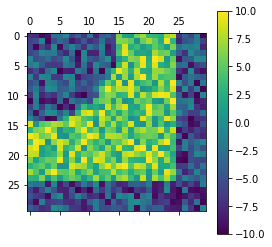

In [2]:
M = np.loadtxt('../../DataSets/DL-ToyImage.csv')
plt.matshow(M)
plt.colorbar()

First, we're going to try out convlution on this image. Here's a convolution filter matrix for us to test this on.

In [11]:
M.shape

(30, 30)

In [3]:
F = np.zeros((5,5))
F[:,:2] = 1
F[:, 3:] = 1
F

array([[1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1.]])

&#9989; **<font color=red>Do this:</font>** Update this `NewM` matrix so that each entry is the convolution of the input image . 

In [26]:
np.sum(in1*F)

-104.00000000000001

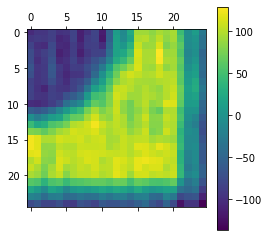

In [27]:
NewM = np.zeros((30-F.shape[0],30-F.shape[0]))
for i in range(NewM.shape[0]):
    for j in range(NewM.shape[1]):
        in1 = M[i:i+5, j:j+5]
        NewM[i,j] = np.sum(in1*F)#<----------- you need to fix this
        
plt.matshow(NewM)
plt.colorbar()

&#9989; **<font color=red>Do this:</font>** Here's a different filter. What happens when you convolve the image with this one instead? 

In [28]:
F = np.zeros((5,5))
F[:2,:] = 1
F

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

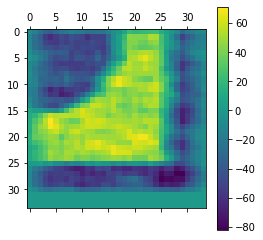

In [34]:
# Your code here
NewM = M[0:30-F.shape[0]:,0:30-F.shape[0]:]
NewM.shape
NewM = convolve(M,F)


plt.matshow(NewM)
plt.colorbar()

## Pooling Layer

After our convolution layer, we often build a pooling layer. 

&#9989; **<font color=red>Do this:</font>** Fix up the following code to create a pooled image from your convolved image.

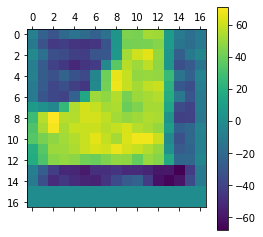

In [35]:
poolM = np.zeros( (NewM.shape[0]//2, NewM.shape[1]//2) )
for i in range(NewM.shape[0]//2):
    for j in range(NewM.shape[0]//2):
        patch = NewM[i * 2:(i + 1) * 2, j * 2:(j + 1) * 2]
#         poolM[i, j] = np.max(patch)
        poolM[i,j] = np.max(patch) #<------------Fix this

plt.matshow(poolM)
plt.colorbar()

## Playing with a pre-trained classifier
As with the regular neural nets, trying to train our own CNN is beyond the scope of the class. But we can play with some toys to see how the trained versions work. 

Open the following in another browser tab to answer the questions below: https://poloclub.github.io/cnn-explainer/


&#9989; **<font color=red>Q:</font>** 
1. Read the section below on what each layer of the network does. 
1. What is the 2nd top prediction output for the bell pepper picture?
1. Clicking on the "+" button lets you upload a picture.  What does your face get classified as?

2. The second top prediction output is an orange. 

3. I put my cat and got a ladybug.